In [35]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [36]:
# this is just for testing, and making my first neural network.

# will be using the fashion dataset from MNIST, built into keras

fashionDataset = keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashionDataset.load_data()

print(trainImages.shape) # 60000 images, 28 by 28 pixels each

(60000, 28, 28)


In [37]:
# to get one pixel
# each pixel is a number between 0 and 255, therefore it is greyscale. 0 is black, 255 is white
# it is a 2d array, 28x28
trainImages[0,23,23]

# first 10 training labels
# from 0 to 9, representing different articles of clothing
trainLabels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [38]:
classNames = ["T-shirt", "Pants", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

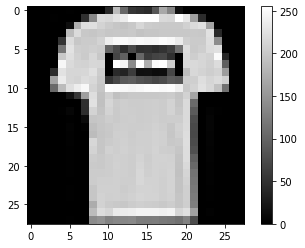

In [39]:
# lastly, we can have a look at the images

plt.figure()
plt.imshow(trainImages[1], cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

In [40]:
# DATA PREPROCESSING

trainImages = trainImages / 255
testImages = testImages / 255

In [42]:
# building the model
# these are three layers, input, hidden, and then output
# the input is 28x28, and there are 10 output nodes representing the choices (types of clothes)
# the nodes are dense (all connected to all) and there are 128 nodes
# softmax makes sure they all add up to one, and the values are all decimals
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [43]:
# compiling the model (it just works)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
# training the model
# epochs is the amount of times it goes thru the data
model.fit(trainImages, trainLabels, epochs=1)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0928 - accuracy: 0.9650


In [63]:
# testing the model
# verbose is how much is logged to the console /shrug
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=1)

print("Test Accuracy", testAcc)
print("Test Loss", testLoss)

# using 30 epochs, the model is "Overfitted", as it just memorized the data before and became not as general, we had too many epochs (accuracy = 88.55%)
# using between 1 and 5 is actually a lot better, which is surprising as it is seeing the data and adjusting less

313/313 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.8835
Test Accuracy 0.8834999799728394
Test Loss 0.5503899455070496


9
Ankle Boot


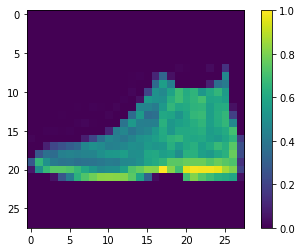

In [72]:
# getting the largest value in the list returns the index, resulting in the class of the image
predictions = model.predict([testImages])
print(np.argmax(predictions[0]))

# this will give ankle boot...
print(classNames[np.argmax(predictions[0])])

# ... and we can check by displaying it
plt.figure()
plt.imshow(testImages[0])
plt.colorbar()
plt.show()